## Classifying Handwritten Digits

In [1]:
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics

We use the toy digit dataset provided by scikit-learn.  

(You may also find it fun later to try your hand at the MNIST dataset, one of the classic initial problems for budding machine-learning practicioners.)

In [2]:
d = sklearn.datasets.load_digits()

In [3]:
print(d.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
x = d.data
y = d.target

In [5]:
x.shape

(1797, 64)

In [6]:
y.shape

(1797,)

In [7]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
y[0]

0

The samples consist of 64 features, one for each pixel value of an 8x8 image array.  We can reshape the sample into an 8x8 array in order to visualize it.

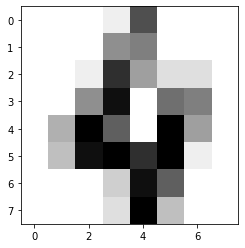

In [9]:
sample = x[4].reshape(8,8)
plt.imshow(sample, cmap='binary')

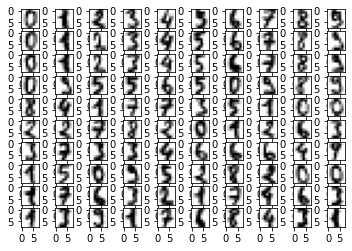

In [10]:
for i in range(100):
    plt.subplot(10,10,i+1)
    sample = x[i].reshape(8,8)
    plt.imshow(sample, cmap='binary')

## Random Forest

In [11]:
import sklearn.ensemble
rf_classifier = sklearn.ensemble.RandomForestClassifier(max_depth=5)

In [12]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)

One catch to watch out for in splitting up your data into training and test sets:  stratification.

Let's say you have a dataset that has 90% cat images and 10% dog images.  If you split your data and end up with 99% cats in your training data and 1% dogs, you'll be training your model on an unrepresentative sample.  (Sampling issues like this can be much more consequential and damaging than distinguishing cats from dogs!)

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

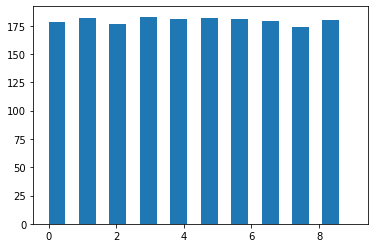

In [13]:
plt.hist(y, width=0.5)

(array([145., 154., 144., 149., 135., 135., 146., 145., 144., 140.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

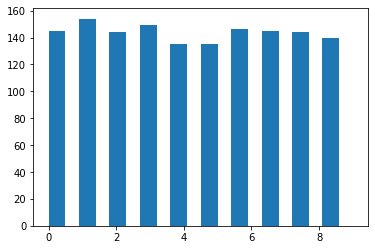

In [14]:
plt.hist(y_train, width=0.5)

Here the difference in percentages is noticeable but not too significant by eye.  Nevertheless, we can stratify our split properly by including the "stratify" parameter and assigning it our target variable.

In [15]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42, stratify=y)

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

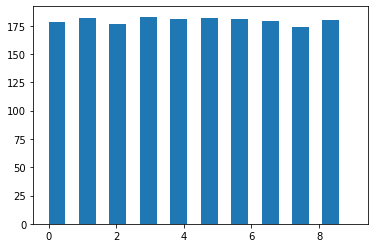

In [16]:
plt.hist(y, width=0.5)

(array([142., 146., 142., 146., 145., 145., 145., 143., 139., 144.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

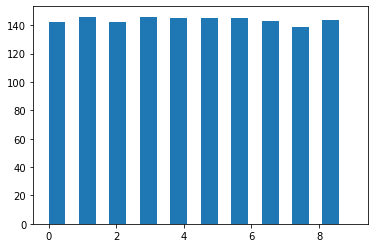

In [17]:
plt.hist(y_train, width=0.5)

In [18]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [19]:
rf_classifier.predict(x_train[[7]])

array([9])

In [20]:
y_train[7]

9

In [21]:
y_pred = rf_classifier.predict(x_test)

In [22]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm

array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  1,  0,  0,  1,  0,  0,  2],
       [ 1,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  1,  0,  1],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  1,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  3, 29,  0],
       [ 0,  0,  0,  2,  1,  0,  0,  3,  1, 29]])

In contrast with binary classification, calculating precision and recall (and etc) for multi-class classification problems can be computed in slightly different ways depending on how one does averaging. 

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. 

In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

In [23]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred, average='micro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred, average='micro'):.2%}")

Accuracy: 93.06%
Precision: 93.06%
Recall: 93.06%


In [24]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred, average='macro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred, average='macro'):.2%}")

Accuracy: 93.06%
Precision: 93.33%
Recall: 93.02%


## Logistic Regression

In [25]:
import sklearn.linear_model
lr_classifier = sklearn.linear_model.LogisticRegression()

In [26]:
lr_classifier.fit(x_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

It will not be uncommon for you to run into scenarios in which you encounter errors when trying to train models.

In such cases, they can be fruitful opportunities to consult the documentation and learn more about various training options.

Here, the error message gives us clues about potentially insightful documentation.

To fast-forward, it will be useful here for Logistic Regression if we rescale our sample data from being integer values over [0:16] to being continuous values scaled to have a normal distribution of values -> the sklearn StandardScaler will rescale the features to have 0 mean and unit variance.

In [27]:
import sklearn.preprocessing

In [28]:
scaler = sklearn.preprocessing.StandardScaler()

In [29]:
x_scaled = scaler.fit_transform(x_train)

In [30]:
x_scaled[0]

array([ 0.        , -0.33046224,  1.2378834 , -0.4274473 ,  0.02312659,
        1.43014397,  2.8413024 , -0.12584318, -0.06103492, -0.62260929,
        1.03165102,  1.00937442,  1.19380133,  1.26496458,  1.39978818,
       -0.13432278, -0.03733267, -0.44168631,  1.05969889,  1.55558209,
        1.44343302,  0.65987225, -0.55382175, -0.11862076, -0.02638899,
       -0.46678045, -0.67658982, -1.14648383,  0.18482758,  1.26093986,
       -0.62828779, -0.0528332 ,  0.        , -0.66752135, -1.05580576,
       -1.45200086, -1.41676906,  1.24934814, -0.81772638,  0.        ,
       -0.0659912 ,  0.47021104,  0.78570258, -1.1315037 , -0.74965266,
        1.20145575, -0.80976799, -0.08215245, -0.03682402,  2.96197729,
        1.32725001, -0.30755292,  0.67686924,  0.37015222, -0.76258772,
       -0.20077038, -0.02638899, -0.29535143,  0.68696673,  0.42410598,
       -0.57242595, -0.81973384, -0.50454776, -0.19360181])

Here's the difference in image between original and rescaled.

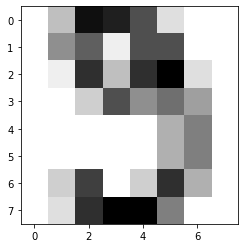

In [31]:
sample = x_train[7].reshape(8,8)
plt.imshow(sample,cmap='binary')

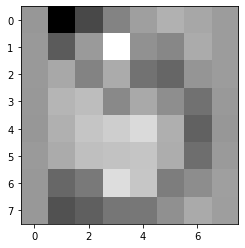

In [32]:
sample = x_scaled[7].reshape(8,8)
plt.imshow(sample,cmap='binary')

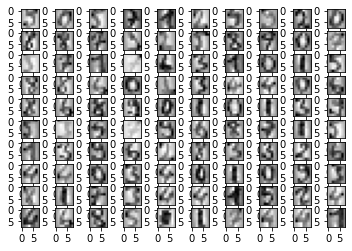

In [33]:
for i in range(100):
    plt.subplot(10,10,i+1)
    sample = x_scaled[i].reshape(8,8)
    plt.imshow(sample, cmap='binary')

In [34]:
lr_classifier.fit(x_scaled, y_train)

LogisticRegression()

In [35]:
lr_classifier.predict(x_scaled[[7]])

array([9])

In [36]:
y_train[7]

9

Our classifier was trained on scaled data, so we must scale any new data similarly (though we only need to do the transform now, not the fit.)

In [37]:
x_test_scaled = scaler.transform(x_test)

In [38]:
y_pred = lr_classifier.predict(x_test_scaled)

In [39]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  1,  1,  0,  0,  0,  2,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 35,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 35]])

In [40]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred, average='micro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred, average='micro'):.2%}")

Accuracy: 97.22%
Precision: 97.22%
Recall: 97.22%


In [41]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred, average='macro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred, average='macro'):.2%}")

Accuracy: 97.22%
Precision: 97.24%
Recall: 97.20%


## Naive Bayes

In [42]:
import sklearn.naive_bayes
nb_classifier = sklearn.naive_bayes.MultinomialNB()

In [43]:
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [44]:
y_pred = nb_classifier.predict(x_test)

In [45]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm

array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 23,  5,  0,  0,  1,  1,  0,  2,  4],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  1, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 31,  0,  0,  0,  5],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  1, 28,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  3,  3, 28]])

In [46]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred, average='micro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred, average='micro'):.2%}")

Accuracy: 88.89%
Precision: 88.89%
Recall: 88.89%


In [47]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred, average='macro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred, average='macro'):.2%}")

Accuracy: 88.89%
Precision: 88.82%
Recall: 88.87%


We could try doing the scaling here too to see if that improves the result.

In [48]:
scaler = sklearn.preprocessing.StandardScaler()

In [49]:
x_scaled = sklearn.preprocessing.StandardScaler().fit_transform(x_train)

In [50]:
nb_classifier.fit(x_scaled, y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

For MultinomialNB, we actually can't use negative values in the training data.  A multinomial distribution is appropriate for discrete positive values (and actually indicates that the original scale is likely best).

If we use MinMaxScaler, though, we'll get a similar standardization of the scaling, but now on the range of [0,1].

In [51]:
scaler = sklearn.preprocessing.MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [52]:
nb_classifier.fit(x_train_scaled, y_train)

MultinomialNB()

In [53]:
y_pred = nb_classifier.predict(x_test_scaled)

In [54]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm

array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 24,  5,  0,  0,  1,  1,  0,  2,  3],
       [ 1,  1, 32,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  1, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 31,  0,  0,  0,  5],
       [ 0,  2,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  1, 28,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  3,  3, 28]])

In [55]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred, average='micro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred, average='micro'):.2%}")

Accuracy: 88.89%
Precision: 88.89%
Recall: 88.89%


In [56]:
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred, average='macro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred, average='macro'):.2%}")

Accuracy: 88.89%
Precision: 88.82%
Recall: 88.86%


## Extra section: Binary Classification and the Precision/Recall Trade-Off

In classification there is a trade-off between optimizing precision and optimizing recall.

The following will allow you to quantify and visualize that trade-off, as well as make plots of the ROC curves (Receiver Operating Characteristic).

ROC is useful for binary classification, when you have a strict population of false-negatives, true-positives, and etc.  Precision and recall are also more easily conceptualized in binary classification, when there is no ambiguity about handling multi-class classification.  Therefore, the below does classification for the classes Fives and Not-Fives.  (You can easily check for other numbers too by changing the 5 to, say, 9).

In [ ]:
y_five = (y == 5)

In [ ]:
y_five

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y_five, test_size=0.2, random_state=42, stratify=y_five)

In [ ]:
import numpy as np

In [ ]:
np.sum(y_five) / y_five.shape

In [ ]:
np.sum(y_test) / y_test.shape

In [ ]:
np.sum(y_train) / y_train.shape

In [ ]:
# Random Forest
rf_classifier = sklearn.ensemble.RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
rf_y_pred = rf_classifier.predict(x_test)
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, rf_y_pred):.2%}")
print(f"RF Precision: {sklearn.metrics.precision_score(y_test, rf_y_pred):.2%}")
print(f"RF Recall: {sklearn.metrics.recall_score(y_test, rf_y_pred):.2%}")
cm = sklearn.metrics.confusion_matrix(y_test, rf_y_pred)
print(cm)

# Logistic Regression
lr_classifier = sklearn.linear_model.LogisticRegression()
x_train_scaled = sklearn.preprocessing.StandardScaler().fit_transform(x_train)
x_test_scaled = sklearn.preprocessing.StandardScaler().fit_transform(x_test)
lr_classifier.fit(x_train_scaled, y_train)
lr_y_pred = lr_classifier.predict(x_test_scaled)
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, lr_y_pred):.2%}")
print(f"LR Precision: {sklearn.metrics.precision_score(y_test, lr_y_pred):.2%}")
print(f"LR Recall: {sklearn.metrics.recall_score(y_test, lr_y_pred):.2%}")
cm = sklearn.metrics.confusion_matrix(y_test, lr_y_pred)
print(cm)

# Multinomial Naive Bayes
nb_classifier = sklearn.naive_bayes.MultinomialNB()
nb_classifier.fit(x_train, y_train)
nb_y_pred = nb_classifier.predict(x_test)
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, nb_y_pred):.2%}")
print(f"NB Precision: {sklearn.metrics.precision_score(y_test, nb_y_pred):.2%}")
print(f"NB Recall: {sklearn.metrics.recall_score(y_test, nb_y_pred):.2%}")
cm = sklearn.metrics.confusion_matrix(y_test, nb_y_pred)
print(cm)

In [ ]:
# rf_y_pred_train = rf_classifier.predict_proba(x_train)
# lr_y_pred_train = lr_classifier.predict_proba(x_train_scaled)
# nb_y_pred_train = nb_classifier.predict_proba(x_train)

# rf_falsePositiveRate, rf_truePositiveRate, rf_thresholds = sklearn.metrics.roc_curve(y_train, rf_y_pred_train[:,1])
# lr_falsePositiveRate, lr_truePositiveRate, lr_thresholds = sklearn.metrics.roc_curve(y_train, lr_y_pred_train[:,1])
# nb_falsePositiveRate, nb_truePositiveRate, nb_thresholds = sklearn.metrics.roc_curve(y_train, nb_y_pred_train[:,1])

In [ ]:
rf_y_scores = sklearn.model_selection.cross_val_predict(rf_classifier, x_train, y_train, cv=3,
                             method="predict_proba")
lr_y_scores = sklearn.model_selection.cross_val_predict(lr_classifier, x_train_scaled, y_train, cv=3,
                             method="predict_proba")
nb_y_scores = sklearn.model_selection.cross_val_predict(nb_classifier, x_train, y_train, cv=3,
                             method="predict_proba")

rf_falsePositiveRate, rf_truePositiveRate, rf_thresholds = sklearn.metrics.roc_curve(y_train, rf_y_scores[:,1])
lr_falsePositiveRate, lr_truePositiveRate, lr_thresholds = sklearn.metrics.roc_curve(y_train, lr_y_scores[:,1])
nb_falsePositiveRate, nb_truePositiveRate, nb_thresholds = sklearn.metrics.roc_curve(y_train, nb_y_scores[:,1])

In [ ]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(rf_falsePositiveRate, rf_truePositiveRate, linewidth=2, color='black', label="RF ROC curve")
plt.plot(lr_falsePositiveRate, lr_truePositiveRate, linewidth=2, color='blue', label="LR ROC curve")
plt.plot(nb_falsePositiveRate, nb_truePositiveRate, linewidth=2, color='green', label="NB ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.legend()
plt.show()

In [ ]:
# rf_y_pred_train = rf_classifier.predict_proba(x_train)
# rf_precisions, rf_recalls, rf_thresholds = sklearn.metrics.precision_recall_curve(y_train, rf_y_pred_train[:,1])

# lr_y_pred_train = lr_classifier.predict_proba(x_train_scaled)
# lr_precisions, lr_recalls, lr_thresholds = sklearn.metrics.precision_recall_curve(y_train, lr_y_pred_train[:,1])

# nb_y_pred_train = nb_classifier.predict_proba(x_train)
# nb_precisions, nb_recalls, nb_thresholds = sklearn.metrics.precision_recall_curve(y_train, nb_y_pred_train[:,1])

In [ ]:
rf_precisions, rf_recalls, rf_thresholds = sklearn.metrics.precision_recall_curve(y_train, rf_y_scores[:,1])

lr_precisions, lr_recalls, lr_thresholds = sklearn.metrics.precision_recall_curve(y_train, lr_y_scores[:,1])

nb_precisions, nb_recalls, nb_thresholds = sklearn.metrics.precision_recall_curve(y_train, nb_y_scores[:,1])

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rf_thresholds, rf_precisions[:-1], "b--", label="RF Precision", linewidth=2)
plt.plot(rf_thresholds, rf_recalls[:-1], "g-", label="RF Recall", linewidth=2)
plt.axis([0, 1, 0, 1.1])
plt.xlabel("Threshold")
plt.legend()

plt.figure(figsize=(8, 4))
plt.plot(lr_thresholds, lr_precisions[:-1], "b--", label="LR Precision", linewidth=2)
plt.plot(lr_thresholds, lr_recalls[:-1], "g-", label="LR Recall", linewidth=2)
plt.axis([0, 1, 0, 1.1])
plt.xlabel("Threshold")
plt.legend()

plt.figure(figsize=(8, 4))
plt.plot(nb_thresholds, nb_precisions[:-1], "b--", label="NB Precision", linewidth=2)
plt.plot(nb_thresholds, nb_recalls[:-1], "g-", label="NB Recall", linewidth=2)
plt.axis([0, 1, 0, 1.1])
plt.xlabel("Threshold")
plt.legend()

plt.show()